In [1]:
import sys
sys.path.append('../')

In [2]:
import osc.importer.sigpac as sigpac

In [3]:
data_37 = sigpac.get_dataframe(sigpac.all_zipcodes(starting_with='37'), 
                               data_dir='../../data',
                               tmp_dir='../../tmp',
                               with_bbox_center=True)

In [6]:
len(data_37)

989254

In [4]:
usos_sigpac = sigpac.read_codigos(data_dir='../../data')

In [5]:
usos_sigpac

,codigo,uso
0,AG,CORRIENTES Y SUPERFICIES DE AGUA
1,CA,VIALES
2,CF,ASOCIACIÓN CÍTRICOS-FRUTALES
3,CI,CITRICOS
4,CO,CONTORNO OLIVAR
5,CS,ASOCIACIÓN CÍTRICOS-FRUTALES DE CÁSCARA
6,CV,ASOCIACIÓN CÍTRICOS-VIÑEDO
7,ED,EDIFICACIONES
8,FF,ASOCIACIÓN FRUTALES-FRUTALES DE CÁSCARA
9,FL,FRUTOS SECOS Y OLIVAR


In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
sns.set(rc={"figure.figsize": (20, 10)})

In [41]:
np.log(data['PEND_MED']).describe()

count    113214.000000
mean          3.439279
std           0.770739
min           0.000000
25%           2.890372
50%           3.433987
75%           3.988984
max           6.473891
Name: PEND_MED, dtype: float64

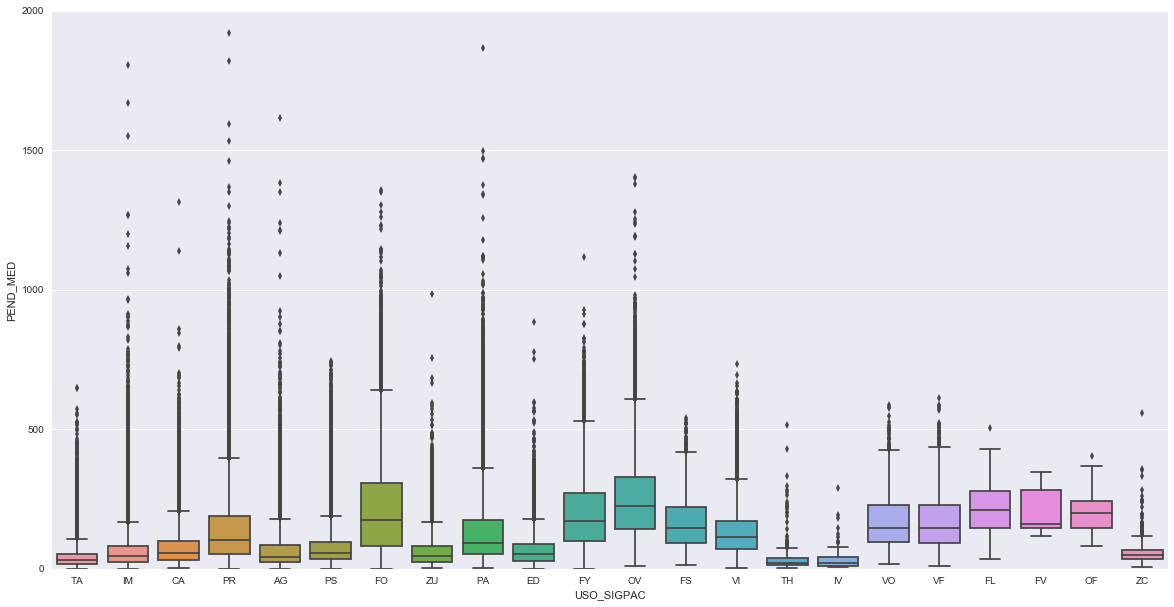

In [8]:
sns.boxplot(x='USO_SIGPAC', y=u'PEND_MED', data = data_37)

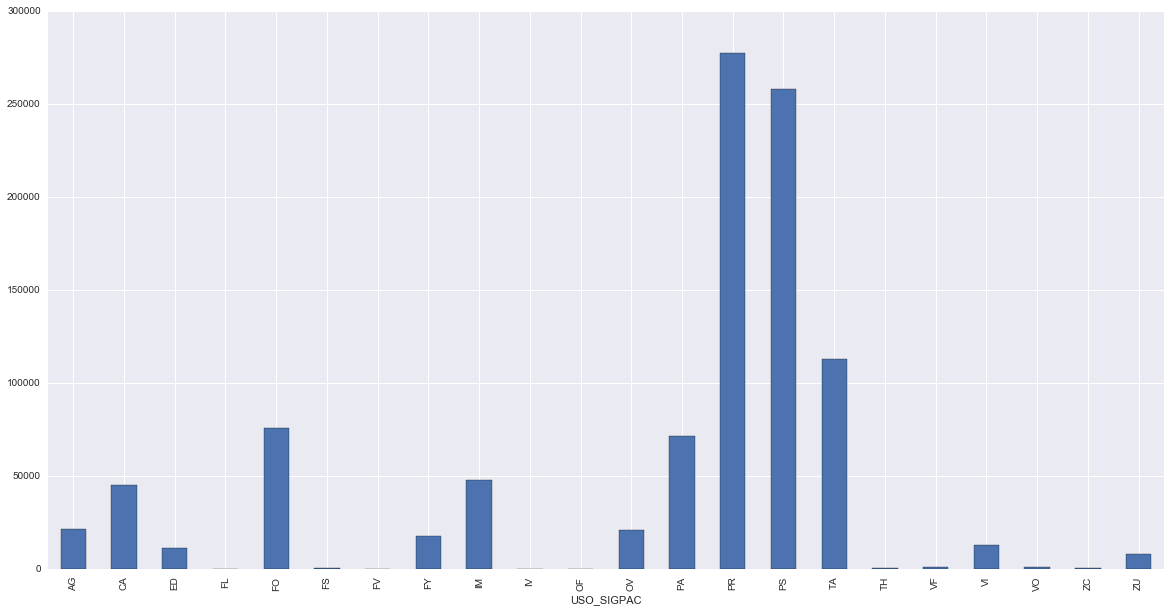

In [15]:
data_37.groupby('USO_SIGPAC').count()['AGREGADO'].plot.bar()

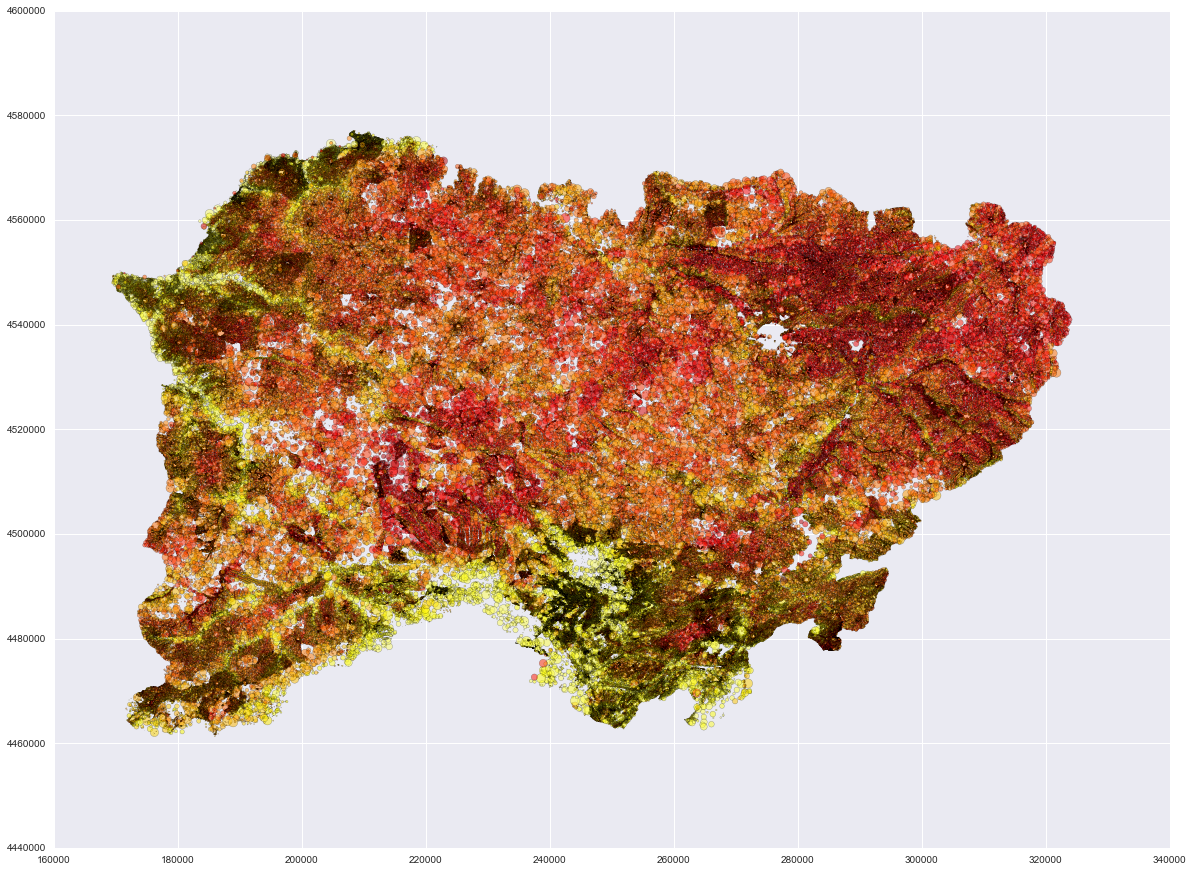

In [45]:
sns.set(rc={"figure.figsize": (20, 15)})
data = data_37[data_37['USO_SIGPAC'] == 'TA']
plt.scatter(x=data['x_bbox_center'], 
            y=data['y_bbox_center'], 
            alpha=0.5,
            c=np.log(data['PEND_MED']/data['PEND_MED'].max()),
            cmap='hot',
            s=((data['SUPERFICIE'] * 100)/ data['SUPERFICIE'].max()))

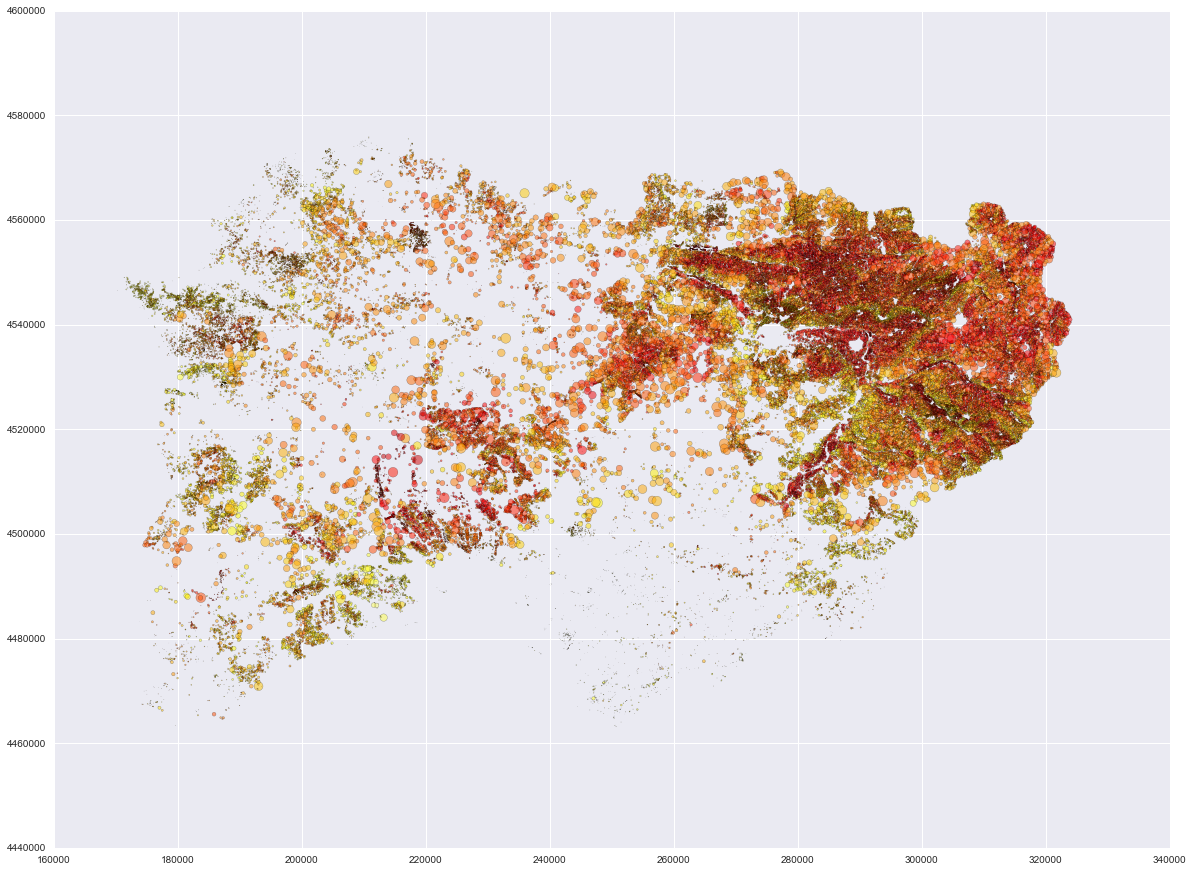

In [46]:
sns.set(rc={"figure.figsize": (20, 15)})
data = data_37[data_37['USO_SIGPAC'] == 'TA']
plt.scatter(x=data['x_bbox_center'], 
            y=data['y_bbox_center'], 
            alpha=0.5,
            c=np.log(data['PEND_MED']),
            cmap='hot',
            s=((data['SUPERFICIE'] * 100)/ data['SUPERFICIE'].max()))

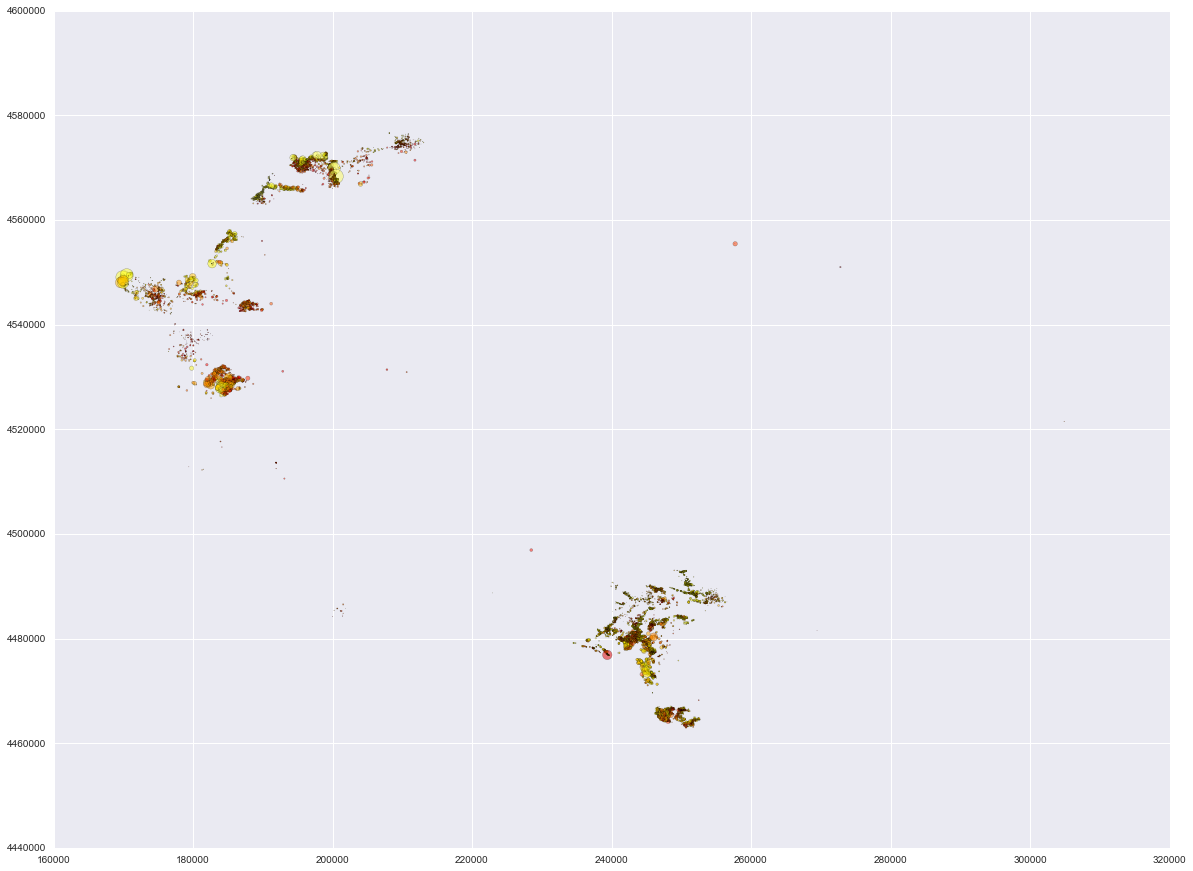

In [47]:
sns.set(rc={"figure.figsize": (20, 15)})
data = data_37[data_37['USO_SIGPAC'] == 'OV']
plt.scatter(x=data['x_bbox_center'], 
            y=data['y_bbox_center'], 
            alpha=0.5,
            c=np.log(data['PEND_MED']),
            cmap='hot',
            s=((data['SUPERFICIE'] * 200)/ data['SUPERFICIE'].max()))

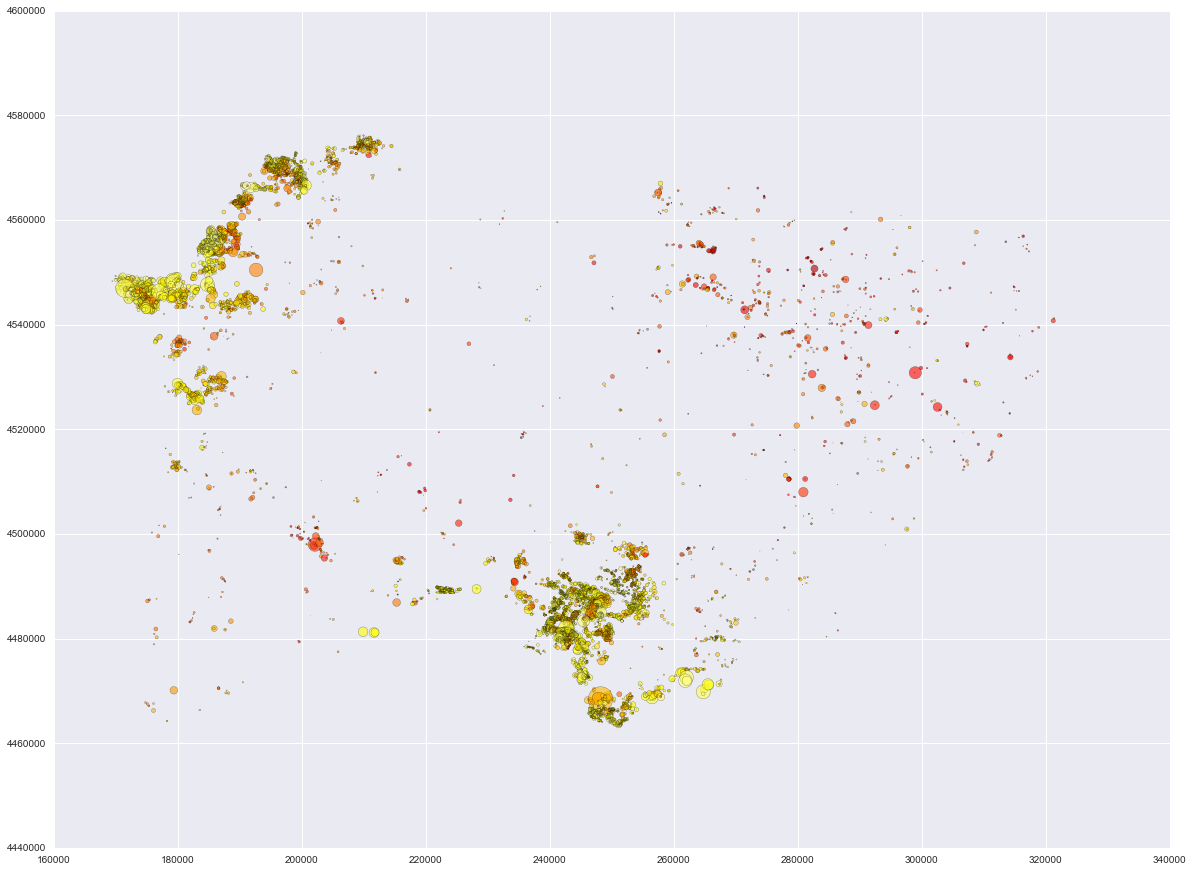

In [49]:
sns.set(rc={"figure.figsize": (20, 15)})
data = data_37[data_37['USO_SIGPAC'].isin(['FY', 'OF', 'VF'])]
plt.scatter(x=data['x_bbox_center'], 
            y=data['y_bbox_center'], 
            alpha=0.6,
            c=np.log(data['PEND_MED']),
            cmap='hot',
            s=((data['SUPERFICIE'] * 600)/ data['SUPERFICIE'].max()))

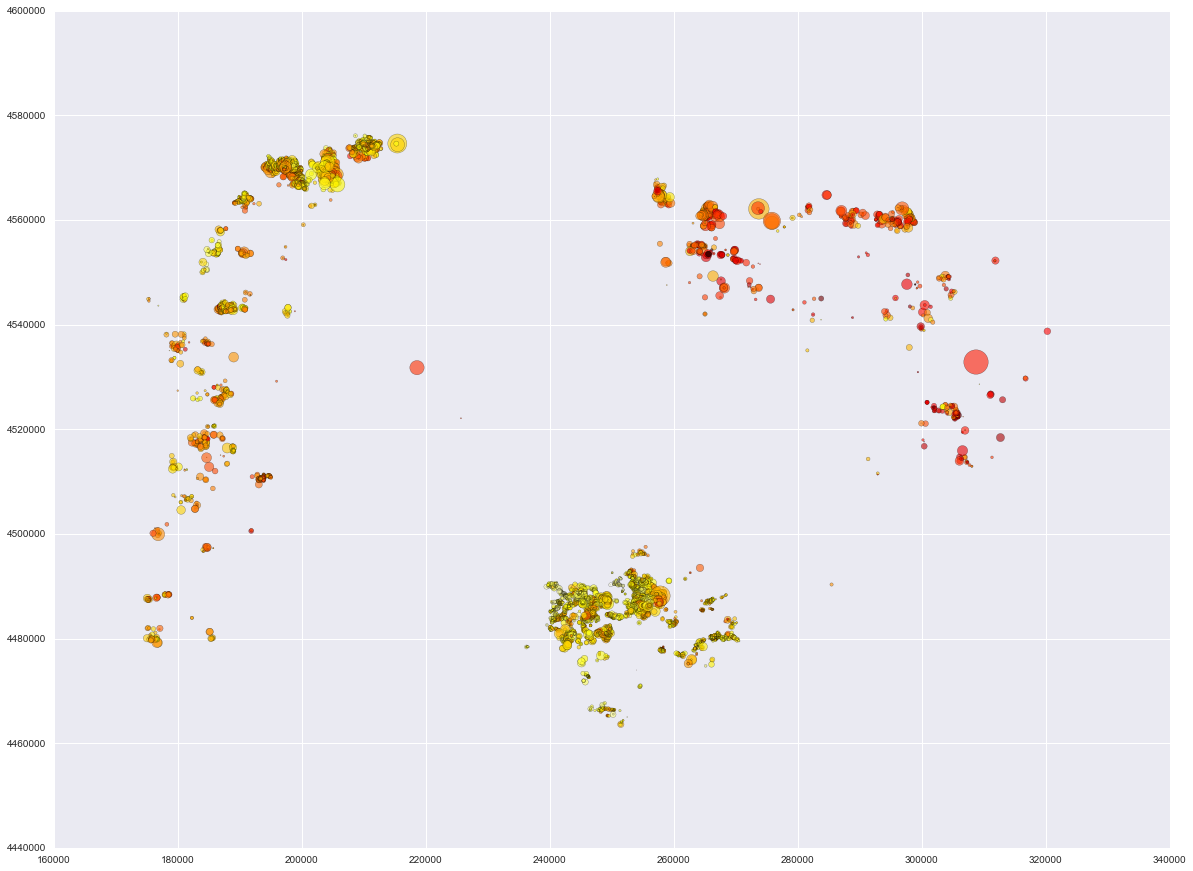

In [50]:
sns.set(rc={"figure.figsize": (20, 15)})
data = data_37[data_37['USO_SIGPAC'].isin(['VF', 'VI', 'VO'])]
plt.scatter(x=data['x_bbox_center'], 
            y=data['y_bbox_center'], 
            alpha=0.6,
            c=np.log(data['PEND_MED']),
            cmap='hot',
            s=((data['SUPERFICIE'] * 600)/ data['SUPERFICIE'].max()))